In [4]:
# %pip install pyreadr
# %pip install catboost
# %pip install lckr-jupyterlab-variableinspector


In [5]:
import sklearn 
import os, sys
#import pyreadr
import pandas as pd
import catboost
from IPython.display import clear_output


In [6]:
work_dir = '/home/idies/workspace/Storage/hnguye78/persistent/cv_surgery'
exec(open(work_dir+'/code/Python/snippets/helpful_functions.py').read())


In [7]:
import multiprocessing as mp
mp.cpu_count()

20

In [8]:
outcome = 'cpvntlng'

In [9]:
load_dir = work_dir+'/csv_files/pre_anat_intra'
feature_space = pd.read_csv(load_dir+'/feature_space_preop_anat_intra_w_interaction_terms.csv') 

In [10]:
feature_space = feature_space.rename(columns={"feature_space.concatid": "concatid"}).drop(['Unnamed: 0'], axis =1)
feature_space.head()

,concatid,proctype,gender,ethnicity,raceasian,raceblack,racecaucasian,raceother,age,heightcm,...,nc_stern.cplegia_ant,nc_stern.cplegia_ret,nc_stern.frepl,nc_stern.inc_revasc,cplegia_ant.cplegia_ret,cplegia_ant.frepl,cplegia_ant.inc_revasc,cplegia_ret.frepl,cplegia_ret.inc_revasc,frepl.inc_revasc
0,10020V313492,2,2,2,2,2,1,2,54.0,155.0,...,2,2,4,4,1,2,2,2,2,4
1,10022V3117559,2,1,2,2,2,1,2,74.0,174.0,...,2,4,4,4,2,2,2,4,4,4
2,10022V315180,6,2,2,2,2,1,2,66.0,157.0,...,2,2,4,2,1,2,1,2,1,2
3,10031V313571,1,2,2,2,2,1,2,79.0,155.5,...,2,2,4,4,1,2,2,2,2,4
4,10047V3420470,1,1,2,2,2,1,2,61.0,170.0,...,4,4,4,4,4,4,4,4,4,4


In [11]:
#label_space = pd.read_csv(smb2.open('//'+work_dir+'/label_space_sts.csv'))
label_space = pd.read_csv(load_dir+'/label_space.csv')

In [12]:
label_space_no_na = label_space.fillna(2)

In [13]:
label_df = label_space_no_na[['concatid', outcome]].drop_duplicates(subset='concatid', keep="last")

In [14]:
label_df.head()

,concatid,cpvntlng
0,10020V313492,2.0
1,10022V3117559,2.0
2,10022V315180,2.0
3,10031V313571,2.0
4,10047V3420470,1.0


In [15]:
data = pd.merge(label_df, feature_space.drop_duplicates(subset='concatid', keep="last")
                , how='left', on='concatid', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [16]:
data_full = data
data = data_full.drop(['concatid'], axis = 1)

In [17]:
data

,cpvntlng,proctype,gender,ethnicity,raceasian,raceblack,racecaucasian,raceother,age,heightcm,...,nc_stern.cplegia_ant,nc_stern.cplegia_ret,nc_stern.frepl,nc_stern.inc_revasc,cplegia_ant.cplegia_ret,cplegia_ant.frepl,cplegia_ant.inc_revasc,cplegia_ret.frepl,cplegia_ret.inc_revasc,frepl.inc_revasc
0,2.0,2,2,2,2,2,1,2,54.0,155.0,...,2,2,4,4,1,2,2,2,2,4
1,2.0,2,1,2,2,2,1,2,74.0,174.0,...,2,4,4,4,2,2,2,4,4,4
2,2.0,6,2,2,2,2,1,2,66.0,157.0,...,2,2,4,2,1,2,1,2,1,2
3,2.0,1,2,2,2,2,1,2,79.0,155.5,...,2,2,4,4,1,2,2,2,2,4
4,1.0,1,1,2,2,2,1,2,61.0,170.0,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34556,1.0,7,1,2,2,2,1,2,81.0,178.1,...,2,4,4,4,2,2,2,4,4,4
34557,2.0,2,1,2,2,2,1,2,66.0,191.0,...,2,4,4,4,2,2,2,4,4,4
34558,2.0,2,1,2,2,2,1,2,82.0,188.0,...,4,4,4,4,4,4,4,4,4,4
34559,2.0,2,1,2,2,2,1,2,55.0,185.0,...,2,4,4,4,2,2,2,4,4,4


In [18]:
data_full.shape

(34561, 15756)

In [19]:
name_list = list(feature_space)


In [20]:
data.rename(columns={outcome: 'label'}, inplace=True)

In [21]:
# change label: 2 (alive) to 0 (class 0)
data.loc[data.label ==2, 'label'] = 0

In [22]:
data['label'].value_counts()


0.0    30324
1.0     4237
Name: label, dtype: int64

In [23]:
# Split train set/test set in stratified fashion, then downsample training set to balance outcome class:
from sklearn import model_selection
outercv = sklearn.model_selection.StratifiedKFold(n_splits=10,shuffle=True,random_state= 1)
X = data.drop(['label'],axis =1).values
y = data[['label']].values

for train_index, test_index in outercv.split(X, y):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

train_df = data.iloc[train_index]
test_df = data.iloc[test_index]
train_df_majority = train_df[train_df['label']==0]
train_df_minority = train_df[train_df['label']==1]

# Downsampling:
from sklearn.utils import resample
train_df_majority_downsampled = resample(train_df_majority, 
                                 replace=False,     # sample without replacement
                                 n_samples=2*train_df_minority.shape[0],    # to match minority class
                                 random_state=1)

df_downsampled = pd.concat([train_df_majority_downsampled, train_df_minority])

In [24]:
# y_test: 1 = dead, 2 = live. Convert live to class 0:

import numpy as np
np.array(np.unique(y_test, return_counts=True)).T
y_test[y_test == 2] = 0
y_train[y_train == 2] = 0
np.array(np.unique(y_test, return_counts=True)).T


array([[0.000e+00, 3.032e+03],
       [1.000e+00, 4.240e+02]])

In [25]:
# Split the training set further to cv_train-validation set, using stratified k-fold cv: 10-fold x 5 times
# train and calibrate models
from sklearn import model_selection
outercv = sklearn.model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats = 2,random_state= 1)

# initialize:
cv_performance_df = pd.DataFrame()
cv_performance_isotonic_df = pd.DataFrame()
cv_performance_sigmoid_df = pd.DataFrame()
training_bs_testset_pred_df = data_full[['concatid',outcome]].loc[test_index,:].rename(columns={outcome: 'label'})
training_bs_testset_pred_calibrated_isotonic_df = training_bs_testset_pred_df.copy(deep = True)
training_bs_testset_pred_calibrated_sigmoid_df = training_bs_testset_pred_df.copy(deep = True)

fold = 1
for cv_train_index, cv_test_index in outercv.split(X_train, y_train):
    print("Fold "+ str(fold) + "....")
    fold = fold + 1
    
    # print("TRAIN:", train_index, "TEST:", test_index)
    cv_X_train, cv_X_test = X_train[cv_train_index], X_train[cv_test_index]
    cv_y_train, cv_y_test = y_train[cv_train_index], y_train[cv_test_index]
    
    cv_train_df = data.iloc[cv_train_index]
    cv_test_df = data.iloc[cv_test_index]
    cv_train_df_majority = cv_train_df[cv_train_df['label']==0]
    cv_train_df_minority = cv_train_df[cv_train_df['label']==1]

    # Downsampling:
    from sklearn.utils import resample
    cv_train_df_majority_downsampled = resample(cv_train_df_majority, 
                                     replace=False,     # sample without replacement
                                     n_samples=2*cv_train_df_minority.shape[0],    # to match minority class
                                     random_state=1)

    # Combine downsampled majority class with minority class
    cv_df_downsampled = pd.concat([cv_train_df_majority_downsampled, cv_train_df_minority])
    cv_X_train_downsampled = cv_df_downsampled.drop(['label'],axis =1)
    cv_y_train_downsampled = cv_df_downsampled['label'].ravel()
    
    
    # Train model:
    from catboost import CatBoostClassifier
    cv_cb_downsampled =  CatBoostClassifier(random_state = 1)
    cv_cb_downsampled.fit(cv_X_train_downsampled, cv_y_train_downsampled, verbose = False)
    clear_output()


    
    # Evaluate model on cv_test_set (validation set):
    cv_y_test_predict_proba_cb_downsampled = cv_cb_downsampled.predict_proba(cv_X_test)[:, 1]
    performance_metrics = performance_wo_figure(cv_y_test, cv_y_test_predict_proba_cb_downsampled, thres = 0.5)
    cv_performance_df = cv_performance_df.append(performance_metrics, ignore_index=True)
    
    
    # Pred prob of model on holdout testset:
    training_bs_testset_pred_df['time_'+str(fold-1)] = cv_cb_downsampled.predict_proba(X_test)[:, 1]
    
    
    
    
    # calibrate model, record performance metric validation set, and pred prob on holdout testset:
    cv_cb_downsampled_isotonic_on_cv = calibrate_model(cv_cb_downsampled, cv_X_train, cv_y_train.ravel(), method = 'isotonic')
    clear_output()
    training_bs_testset_pred_calibrated_isotonic_df['time_'+str(fold-1)] = cv_cb_downsampled_isotonic_on_cv.predict_proba(X_test)[:, 1]

    cv_y_test_predict_proba_cb_downsampled_isotonic = cv_cb_downsampled_isotonic_on_cv.predict_proba(cv_X_test)[:, 1]
    clear_output()
    performance_metrics_isotonic = performance_wo_figure(cv_y_test, cv_y_test_predict_proba_cb_downsampled_isotonic, thres = 0.5)
    cv_performance_isotonic_df = cv_performance_isotonic_df.append(performance_metrics_isotonic, ignore_index=True)

    
    cv_cb_downsampled_sigmoid_on_cv = calibrate_model(cv_cb_downsampled, cv_X_train, cv_y_train.ravel(), method = 'sigmoid')
    clear_output()

    training_bs_testset_pred_calibrated_sigmoid_df['time_'+str(fold-1)] = cv_cb_downsampled_sigmoid_on_cv.predict_proba(X_test)[:, 1]
    
    cv_y_test_predict_proba_cb_downsampled_sigmoid = cv_cb_downsampled_sigmoid_on_cv.predict_proba(cv_X_test)[:, 1]
    performance_metrics_sigmoid = performance_wo_figure(cv_y_test, cv_y_test_predict_proba_cb_downsampled_sigmoid, thres = 0.5)
    cv_performance_sigmoid_df = cv_performance_sigmoid_df.append(performance_metrics_sigmoid, ignore_index=True)
    
    clear_output()


In [26]:
training_bs_testset_pred_df.to_csv(load_dir+'/'+'patient_specific_pred_prob_testset_' + outcome +'.csv', index=False)
training_bs_testset_pred_calibrated_isotonic_df.to_csv(load_dir+'/'+'patient_specific_pred_prob_testset_isotonic_on_cv_' + outcome +'.csv', index=False)
training_bs_testset_pred_calibrated_sigmoid_df.to_csv(load_dir+'/'+'patient_specific_pred_prob_testset_sigmoid_on_cv_' + outcome +'.csv', index=False)


In [27]:
cv_performance_df.to_csv(load_dir+'/'+'cv_performance_df_' + outcome +'.csv', index=False)
cv_performance_df.describe(percentiles = [.025, .5, .975]).round(decimals = 3)


,ARC,AUROC,Brier,F1,accuracy,precision,recall,sens,spec
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,0.661,0.917,0.087,0.628,0.891,0.541,0.751,0.751,0.911
std,0.023,0.007,0.002,0.011,0.003,0.010,0.018,0.018,0.004
min,0.615,0.901,0.084,0.614,0.888,0.528,0.727,0.727,0.904
2.5%,0.621,0.904,0.084,0.614,0.888,0.529,0.728,0.728,0.905
50%,0.665,0.917,0.087,0.627,0.891,0.539,0.747,0.747,0.910
97.5%,0.688,0.925,0.090,0.646,0.897,0.557,0.781,0.781,0.916
max,0.688,0.926,0.090,0.647,0.897,0.559,0.784,0.784,0.916


In [28]:
# print out performance:
print_cv_performance = pd.DataFrame(cv_performance_df[['AUROC', 'accuracy', 'ARC', 'Brier', 'F1','precision','recall', 'sens', 'spec']].apply(lambda x: report_metric(x), axis = 0)).transpose()

print_cv_performance.to_csv(load_dir+'/'+'print_cv_performance_' + outcome +'.csv', index=False)
print_cv_performance

,AUROC,accuracy,ARC,Brier,F1,precision,recall,sens,spec
0,"0.917 (0.904, 0.925)","0.891 (0.888, 0.897)","0.665 (0.621, 0.688)","0.087 (0.084, 0.09)","0.627 (0.614, 0.646)","0.539 (0.529, 0.557)","0.747 (0.728, 0.781)","0.747 (0.728, 0.781)","0.91 (0.905, 0.916)"


In [29]:
cv_performance_isotonic_df.to_csv(load_dir+'/'+'cv_performance_isotonic_df_' + outcome +'.csv', index=False)
print_cv_performance_isotonic = pd.DataFrame(cv_performance_isotonic_df[['AUROC', 'accuracy', 'ARC', 'Brier', 'F1','precision','recall', 'sens', 'spec']].apply(lambda x: report_metric(x), axis = 0)).transpose()
print_cv_performance_isotonic.to_csv(load_dir+'/'+'print_cv_performance_isotonic_' + outcome +'.csv', index=False)
print_cv_performance_isotonic

,AUROC,accuracy,ARC,Brier,F1,precision,recall,sens,spec
0,"0.844 (0.828, 0.856)","0.895 (0.892, 0.898)","0.505 (0.48, 0.537)","0.08 (0.078, 0.083)","0.405 (0.382, 0.447)","0.663 (0.636, 0.68)","0.292 (0.272, 0.335)","0.292 (0.272, 0.335)","0.978 (0.975, 0.981)"


In [30]:
cv_performance_sigmoid_df.to_csv(load_dir+'/'+'cv_performance_sigmoid_df_' + outcome +'.csv', index=False)
print_cv_performance_sigmoid = pd.DataFrame(cv_performance_sigmoid_df[['AUROC', 'accuracy', 'ARC', 'Brier', 'F1','precision','recall', 'sens', 'spec']].apply(lambda x: report_metric(x), axis = 0)).transpose()
print_cv_performance_sigmoid.to_csv(load_dir+'/'+'print_cv_performance_sigmoid_' + outcome +'.csv', index=False)
print_cv_performance_sigmoid

,AUROC,accuracy,ARC,Brier,F1,precision,recall,sens,spec
0,"0.845 (0.828, 0.856)","0.896 (0.892, 0.898)","0.505 (0.481, 0.54)","0.082 (0.079, 0.084)","0.411 (0.388, 0.435)","0.659 (0.635, 0.685)","0.298 (0.279, 0.324)","0.298 (0.279, 0.324)","0.978 (0.976, 0.981)"


In [31]:
# Save models:
import pickle
pickle.dump(cv_cb_downsampled, open(work_dir+'/models/pre_anat_intra/'+'model_' +outcome + '_cv_cb_downsampled.sav', 'wb'))
pickle.dump(cv_cb_downsampled_isotonic_on_cv, open(work_dir+'/models/pre_anat_intra/'+'model_' +outcome + '_cv_cb_downsampled_isotonic_calibration_on_cv.sav', 'wb'))
pickle.dump(cv_cb_downsampled_sigmoid_on_cv, open(work_dir+'/models/pre_anat_intra/'+'model_' +outcome + '_cv_cb_downsampled_isotonic_calibration_on_cv.sav', 'wb'))


In [32]:
# Variable Importance:

feature_imp_df = cv_cb_downsampled.get_feature_importance(prettified = True)
feature_imp_df_sort = feature_imp_df.sort_values(by='Importances', ascending=False, inplace=False, kind='quicksort', na_position='last')
feature_imp_df_sort.to_csv(load_dir+'/'+'feature_imp_df_sort_'+outcome+'.csv', index=False)

decouple_var_imp_sort = decouple_var_imp(feature_imp_df_sort)
decouple_var_imp_sort.to_csv(load_dir+'/'+'decouple_var_imp_sort_'+outcome+'.csv', index=False)
decouple_var_imp_sort.iloc[:10,:]

<string>:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Feature Id,total_importance,min_max_scale_importance
55,perfustm,5.411925,1.000000
13,pasys,5.301718,0.979636
36,iabp_iop,4.802786,0.887445
5,bmi,4.515997,0.834453
8,wbc,4.341324,0.802177
4,age,4.248262,0.784982
65,ppef,4.091557,0.756026
12,totalbumin,3.731422,0.689482
0,precardsup,3.700437,0.683756
9,ibdrbcu,3.613828,0.667753


In [33]:
# Bootstrap testset:
bs_testset_performance_df = pd.DataFrame()
bs_testset_performance_isotonic_df = pd.DataFrame()
bs_testset_performance_sigmoid_df = pd.DataFrame()
for i in range(100):
    sample_indices = np.random.randint(len(X_test), size=len(X_test))
    bs_y_test = y_test[sample_indices]
    bs_X_test = X_test[sample_indices,:]
    
    bs_y_test_predict_proba_cb_downsampled = cv_cb_downsampled.predict_proba(bs_X_test)[:, 1]
    bs_performance_metrics = performance_wo_figure(bs_y_test, bs_y_test_predict_proba_cb_downsampled, thres = 0.5)
    bs_testset_performance_df = bs_testset_performance_df.append(bs_performance_metrics, ignore_index=True)

    
    bs_y_test_predict_proba_cb_downsampled_isotonic = cv_cb_downsampled_isotonic_on_cv.predict_proba(bs_X_test)[:, 1]
    bs_performance_metrics_isotonic = performance_wo_figure(bs_y_test, bs_y_test_predict_proba_cb_downsampled_isotonic, thres = 0.5)
    bs_testset_performance_isotonic_df = bs_testset_performance_isotonic_df.append(bs_performance_metrics_isotonic, ignore_index=True)
    
    bs_y_test_predict_proba_cb_downsampled_sigmoid = cv_cb_downsampled_sigmoid_on_cv.predict_proba(bs_X_test)[:, 1]
    bs_performance_metrics_sigmoid = performance_wo_figure(bs_y_test, bs_y_test_predict_proba_cb_downsampled_sigmoid, thres = 0.5)
    bs_testset_performance_sigmoid_df = bs_testset_performance_sigmoid_df.append(bs_performance_metrics_sigmoid, ignore_index=True)

In [34]:
bs_testset_performance_df.to_csv(load_dir+'/'+'bs_testset_performance_df_' + outcome +'.csv', index=False)
bs_testset_performance_isotonic_df.to_csv(load_dir+'/'+'bs_testset_performance_isotonic_df_' + outcome +'.csv', index=False)
bs_testset_performance_sigmoid_df.to_csv(load_dir+'/'+'bs_testset_performance_sigmoid_df_' + outcome +'.csv', index=False)

In [35]:
bs_testset_performance_df.describe(percentiles = [.025, .5, .975]).round(decimals = 3)

,ARC,AUROC,Brier,F1,accuracy,precision,recall,sens,spec
count,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
mean,0.674,0.914,0.084,0.645,0.900,0.568,0.746,0.746,0.921
std,0.028,0.008,0.003,0.018,0.005,0.020,0.022,0.022,0.005
min,0.612,0.896,0.076,0.604,0.886,0.517,0.701,0.701,0.908
2.5%,0.623,0.899,0.079,0.609,0.891,0.533,0.704,0.704,0.913
50%,0.670,0.915,0.084,0.646,0.899,0.569,0.746,0.746,0.921
97.5%,0.731,0.930,0.089,0.677,0.908,0.602,0.787,0.787,0.929
max,0.759,0.932,0.091,0.693,0.915,0.619,0.793,0.793,0.932


In [36]:
# print out performance:
print_bs_testset_performance = pd.DataFrame(bs_testset_performance_df[['AUROC', 'accuracy', 'ARC', 'Brier', 'F1','precision','recall', 'sens', 'spec']].apply(lambda x: report_metric(x), axis = 0)).transpose()
print_bs_testset_performance.to_csv(load_dir+'/'+'print_bs_testset_performance_' + outcome +'.csv', index=False)
print_bs_testset_performance

,AUROC,accuracy,ARC,Brier,F1,precision,recall,sens,spec
0,"0.915 (0.899, 0.93)","0.899 (0.891, 0.908)","0.67 (0.623, 0.731)","0.084 (0.079, 0.089)","0.646 (0.609, 0.677)","0.569 (0.533, 0.602)","0.746 (0.704, 0.787)","0.746 (0.704, 0.787)","0.921 (0.913, 0.929)"


In [37]:
# print out performance:
print_bs_testset_performance_isotonic = pd.DataFrame(bs_testset_performance_isotonic_df[['AUROC', 'accuracy', 'ARC', 'Brier', 'F1','precision','recall', 'sens', 'spec']].apply(lambda x: report_metric(x), axis = 0)).transpose()
print_bs_testset_performance_isotonic.to_csv(load_dir+'/'+'print_bs_testset_performance_isotonic_' + outcome +'.csv', index=False)
print_bs_testset_performance_isotonic

,AUROC,accuracy,ARC,Brier,F1,precision,recall,sens,spec
0,"0.845 (0.826, 0.867)","0.899 (0.887, 0.908)","0.534 (0.483, 0.598)","0.078 (0.071, 0.084)","0.418 (0.363, 0.474)","0.692 (0.612, 0.764)","0.302 (0.256, 0.351)","0.302 (0.256, 0.351)","0.981 (0.976, 0.986)"


In [38]:
# print out performance:
print_bs_testset_performance_sigmoid = pd.DataFrame(bs_testset_performance_sigmoid_df[['AUROC', 'accuracy', 'ARC', 'Brier', 'F1','precision','recall', 'sens', 'spec']].apply(lambda x: report_metric(x), axis = 0)).transpose()
print_bs_testset_performance_sigmoid.to_csv(load_dir+'/'+'print_bs_testset_performance_isotonic_' + outcome +'.csv', index=False)
print_bs_testset_performance_sigmoid

,AUROC,accuracy,ARC,Brier,F1,precision,recall,sens,spec
0,"0.845 (0.827, 0.867)","0.9 (0.887, 0.909)","0.534 (0.483, 0.599)","0.078 (0.071, 0.085)","0.435 (0.376, 0.486)","0.686 (0.62, 0.764)","0.318 (0.273, 0.367)","0.318 (0.273, 0.367)","0.98 (0.975, 0.985)"


	Brier: 0.087
	AUC: 0.902
	arc: 0.660

	Accuracy at threshold: 0.896
	Precision at threshold: 0.565
	Recall at threshold: 0.723
	F1 at threshold: 0.634
	Sensitivity at threshold: 0.723
	Specificity at threshold: 0.920


[[2782  241]
 [ 120  313]]


              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      3023
         1.0       0.56      0.72      0.63       433

    accuracy                           0.90      3456
   macro avg       0.76      0.82      0.79      3456
weighted avg       0.91      0.90      0.90      3456





{'AUROC': 0.901920533798232,
 'accuracy': 0.8955439814814815,
 'ARC': 0.6602094070269747,
 'Brier': 0.08727963905275568,
 'F1': 0.6342451874366769,
 'precision': 0.5649819494584838,
 'recall': 0.7228637413394919,
 'sens': 0.7228637413394919,
 'spec': 0.9202778696658948}

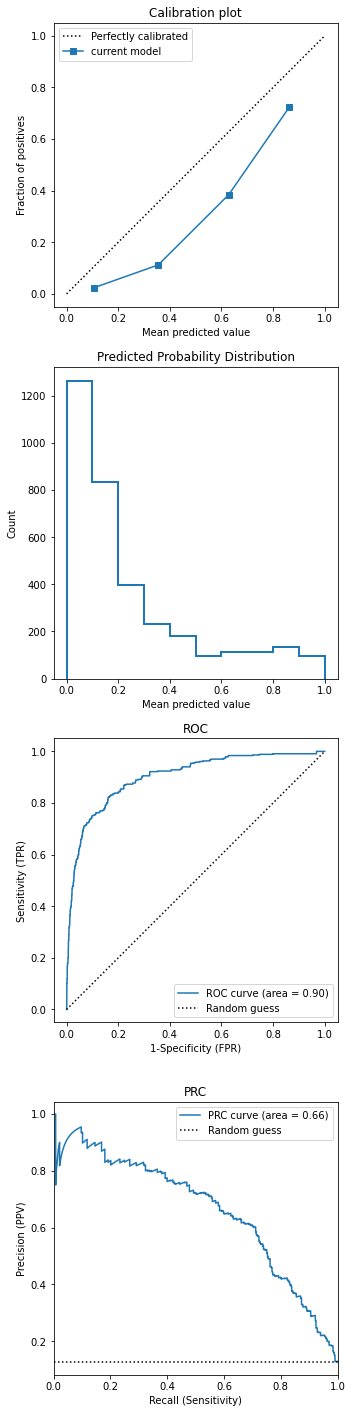

In [39]:
# Plot performance figures:
performance(bs_y_test, bs_y_test_predict_proba_cb_downsampled, thres = 0.5)

In [40]:
# import matplotlib as plt
# plt.rcParams["figure.figsize"] = (12,7)
# ax = feature_imp_df_sort.plot('Feature', 'Score', kind='bar', color='c')
# ax.set_title("Feature Importance using Permutation method", fontsize = 14)
# ax.set_xlabel("features")


In [41]:
# # Train and calibrate model on entirety of the training set:

# X_train_downsampled = df_downsampled.drop(['label'],axis =1)
# y_train_downsampled = df_downsampled['label'].ravel()
# from catboost import CatBoostClassifier
# cb_downsampled =  CatBoostClassifier(random_state = 1)
# cb_downsampled.fit(X_train_downsampled, y_train_downsampled, cat_features = np.array(get_cat_features(X_train_downsampled, 5)), verbose = False)
# pickle.dump(cb_downsampled, open('model_' +outcome + '_cb_downsampled.sav', 'wb'))

# # Create a corrected classifier. - Isotonic calibration
# cb_downsampled_iso = sklearn.calibration.CalibratedClassifierCV(cb_downsampled, cv=10, method='isotonic')
# cb_downsampled_iso.fit(X_train_downsampled, y_train_downsampled.ravel())

# pickle.dump(cb_downsampled_iso, open('model_' +outcome + '_cb_downsampled_iso.sav', 'wb'))

# cb_downsampled_sigmoid = sklearn.calibration.CalibratedClassifierCV(cb_downsampled, cv=10, method='sigmoid')
# cb_downsampled_sigmoid.fit(X_train_downsampled, y_train_downsampled.ravel())
# pickle.dump(cb_downsampled_sigmoid, open('model_' +outcome + '_cb_downsampled_sigmoid.sav', 'wb'))

# # loaded_model = pickle.load(open('model_' +outcome + '_cb_downsampled_iso.sav', 'rb'))
# # y_test_predict_proba_loaded_model = loaded_model.predict_proba(X_test)[:, 1]

# # # Bootstrap testset:
# # bs_testset_performance_df = pd.DataFrame()
# # for i in range(10):
# #     sample_indices = np.random.randint(len(X_test), size=len(X_test))
# #     bs_y_test = y_test[sample_indices]
# #     bs_X_test = X_test[sample_indices,:]
# #     bs_y_test_predict_proba_cb_downsampled_iso = cb_downsampled_iso.predict_proba(bs_X_test)[:, 1]
# #     bs_performance_metrics = performance(bs_y_test, bs_y_test_predict_proba_cb_downsampled_iso, thres = 0.5)
# #     bs_testset_performance_df = bs_testset_performance_df.append(bs_performance_metrics, ignore_index=True)


In [42]:
# # Bootstrap testset and spit prediction using calibrated model:
# import pickle
# import sklearn
# iso_model = pickle.load(open('model_' +outcome + '_cb_downsampled_iso.sav', 'rb'))

# bs_testset_pred_df = pd.DataFrame(list(zip(data_full['concatid'][test_index], test_index)),
#                                 columns=['concatid', 'index'])
# bs_testset_performance_iso_df = pd.DataFrame()
# for i in range(10):
#     sample_indices = np.random.randint(len(X_test), size=len(X_test))
#     bs_y_test = y_test[sample_indices]
#     bs_X_test = X_test[sample_indices,:]
#     bs_y_test_predict_proba_cb_downsampled_iso = iso_model.predict_proba(bs_X_test)[:, 1]
#     bs_performance_metrics = performance_wo_figure(bs_y_test, bs_y_test_predict_proba_cb_downsampled_iso, thres = 0.5)
#     bs_testset_performance_iso_df = bs_testset_performance_iso_df.append(bs_performance_metrics, ignore_index=True)


In [43]:
# bs_testset_performance_iso_df

In [44]:
# iso_model = pickle.load(open('model_' +outcome + '_cb_downsampled_iso.sav', 'rb'))
# y_test_predict_proba_cb_downsampled_iso = iso_model.predict_proba(X_test)[:, 1]
# testset_iso_pred_df = pd.DataFrame(list(zip(y_test, y_test_predict_proba_cb_downsampled_iso)),
#                                 columns=['label', 'pred'])
# testset_iso_pred_df.to_csv(load_dir+'/'+'pred_prob_testset_iso_' + outcome +'.csv', index=False)

In [45]:
# before_iso_model = pickle.load(open('model_' +outcome + '_cv_cb_downsampled.sav', 'rb'))
# y_test_predict_proba_cb_downsampled = before_iso_model.predict_proba(X_test)[:, 1]
# testset_pred_df = pd.DataFrame(list(zip(y_test, y_test_predict_proba_cb_downsampled)),
#                                 columns=['label', 'pred'])
# testset_pred_df.to_csv(load_dir+'/'+'pred_prob_testset_before_iso_' + outcome +'.csv', index=False)

In [46]:
# import pickle
# from sklearn import calibration
# cv_cb_downsampled = pickle.load(open('model_' +outcome + '_cv_cb_downsampled.sav', 'rb'))
# cv_cb_downsampled_sigmoid = sklearn.calibration.CalibratedClassifierCV(cv_cb_downsampled, cv=10, method='sigmoid')
# cv_cb_downsampled_sigmoid.fit(X_train, y_train.ravel())
# pickle.dump(cv_cb_downsampled_sigmoid, open('model_' +outcome + '_cv_cb_downsampled_sigmoid.sav', 'wb'))


In [47]:
# cv_sigmoid_model = pickle.load(open('model_' +outcome + '_cv_cb_downsampled_sigmoid.sav', 'rb'))
# y_test_predict_proba_cb_downsampled = cv_sigmoid_model.predict_proba(X_test)[:, 1]
# testset_pred_df = pd.DataFrame(list(zip(y_test, y_test_predict_proba_cb_downsampled)),
#                                 columns=['label', 'pred'])
# testset_pred_df.to_csv(load_dir+'/'+'pred_prob_testset_sigmoid_' + outcome +'.csv', index=False)

In [48]:
# import pickle
# from sklearn import calibration
# cv_cb_downsampled = pickle.load(open('model_' +outcome + '_cv_cb_downsampled.sav', 'rb'))
# cv_cb_downsampled_isotonic = sklearn.calibration.CalibratedClassifierCV(cv_cb_downsampled, cv=10, method='isotonic')
# cv_cb_downsampled_isotonic.fit(X_train, y_train.ravel())
# pickle.dump(cv_cb_downsampled_isotonic, open('model_' +outcome + '_cv_cb_downsampled_isotonic.sav', 'wb'))
# cv_isotonic_model = pickle.load(open('model_' +outcome + '_cv_cb_downsampled_isotonic.sav', 'rb'))
# y_test_predict_proba_cb_downsampled = cv_isotonic_model.predict_proba(X_test)[:, 1]
# testset_pred_df = pd.DataFrame(list(zip(y_test, y_test_predict_proba_cb_downsampled)),
#                                 columns=['label', 'pred'])
# testset_pred_df.to_csv(load_dir+'/'+'pred_prob_testset_isotonic_' + outcome +'.csv', index=False)


In [49]:
# import pickle
# from sklearn import calibration
# cv_cb_downsampled = pickle.load(open('model_' +outcome + '_cv_cb_downsampled.sav', 'rb'))
# cv_cb_downsampled_isotonic_on_db = sklearn.calibration.CalibratedClassifierCV(cv_cb_downsampled, cv=10, method='isotonic')
# X_train_downsampled = df_downsampled.drop(['label'],axis =1)
# y_train_downsampled = df_downsampled['label'].ravel()
# cv_cb_downsampled_isotonic_on_db.fit(X_train_downsampled, y_train_downsampled.ravel())
# pickle.dump(cv_cb_downsampled_isotonic_on_db, open('model_' +outcome + '_cv_cb_downsampled_isotonic_on_db.sav', 'wb'))
# cv_isotonic_model_on_db = pickle.load(open('model_' +outcome + '_cv_cb_downsampled_isotonic_on_db.sav', 'rb'))
# y_test_predict_proba_cb_downsampled = cv_isotonic_model_on_db.predict_proba(X_test)[:, 1]
# testset_pred_df = pd.DataFrame(list(zip(y_test, y_test_predict_proba_cb_downsampled)),
#                                 columns=['label', 'pred'])
# testset_pred_df.to_csv(load_dir+'/'+'pred_prob_testset_isotonic_on_db_' + outcome +'.csv', index=False)


In [50]:
# import pickle
# from sklearn import calibration
# cv_cb_downsampled = pickle.load(open('model_' +outcome + '_cv_cb_downsampled.sav', 'rb'))
# cv_cb_downsampled_isotonic_on_cv = sklearn.calibration.CalibratedClassifierCV(cv_cb_downsampled, cv=10, method='isotonic')
# cv_cb_downsampled_isotonic_on_cv.fit(cv_X_train, cv_y_train.ravel())
# pickle.dump(cv_cb_downsampled_isotonic_on_cv, open('model_' +outcome + '_cv_cb_downsampled_isotonic_on_cv.sav', 'wb'))
# cv_isotonic_model_on_cv = pickle.load(open('model_' +outcome + '_cv_cb_downsampled_isotonic_on_cv.sav', 'rb'))
# y_test_predict_proba_cb_downsampled = cv_isotonic_model_on_cv.predict_proba(X_test)[:, 1]
# testset_pred_df = pd.DataFrame(list(zip(y_test, y_test_predict_proba_cb_downsampled)),
#                                 columns=['label', 'pred'])
# testset_pred_df.to_csv(load_dir+'/'+'pred_prob_testset_isotonic_on_cv_' + outcome +'.csv', index=False)


### Holdout testset feature space and sts_pred_prob filter:


In [51]:

# testset_df = data_full.iloc[test_index,:]
# testset_df.to_csv(load_dir+'/'+'testset_feature_df_' + outcome +'.csv', index=True)
# # load sts pred prob and filter only patients in the holdout test set:
# load_dir = '/home/idies/workspace/Storage/hnguye78/persistent'+'/csv_files'
# sts_pred_prob_df = pd.read_csv(load_dir+'/sts_pred_prob.csv')
# sts_pred_prob_df['concatid'] = sts_pred_prob_df['patid']+sts_pred_prob_df['recordid']
# sts_pred_prob_df_rm_dups = sts_pred_prob_df.drop_duplicates(subset='concatid', keep="last")
# sts_pred_prob_testset = sts_pred_prob_df_rm_dups.loc[sts_pred_prob_df_rm_dups['concatid'].isin(testset_df['concatid']),['concatid', 'predvent']]

# sts_pred_prob_testset.to_csv(load_dir+'/'+'sts_pred_prob_testset_' + outcome +'.csv', index=False)
# # # check to make sure the concatid in sts_pred_prob and in the testset are the same: 
# print(sorted(list(sts_pred_prob_testset['concatid'])) == sorted(list(testset_df['concatid'])))
# # # True

### Predicted Probability of Patients in Non-STS Set:

In [52]:
# load_dir = '/home/idies/workspace/Storage/hnguye78/persistent'+'/csv_files'
# feature_space_non_sts_patients = pd.read_csv(load_dir+'/non_sts_patients_feature_space.csv')
# X_non_sts = feature_space_non_sts_patients.drop(['label','Unnamed: 0', 'concatid'], axis = 1).values
# import pickle
# import sklearn
# loaded_model = pickle.load(open('model_' +outcome + '_cv_cb_downsampled.sav', 'rb'))
# y_non_sts_predict_proba = loaded_model.predict_proba(X_non_sts)[:, 1]

# prob_risk_non_sts_df = pd.DataFrame(list(zip(feature_space_non_sts_patients['concatid'], y_non_sts_predict_proba)),
#                                 columns=['concatid', 'predicted_prob'])
# prob_risk_non_sts_df.to_csv(load_dir+'/'+'pred_prob_non_sts_patients_df_' + outcome +'.csv', index=False)
# # # check to see that the non_sts set does not overlap with the testset concatid 
# # set((prob_risk_non_sts_df['concatid'])).intersection((set(testset_df['concatid'])))
# # # no overlap